# Solution for last example

From the end of [Lecture 7](./Lec07-ComputingHomology.ipynb).

In [1]:
import smith
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from smith import plotFirstSetOfMatrices, plotSecondSetOfMatrices

For the following example (the tetrahedron is empty):

![Simplicial Complex example 3](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_3.png)

- What are the boundary matrices $\partial_0$, $\partial_1$, and $\partial_2$?
- Use the `smith` package to get the smith normal form of each.
- Fill out the table below to determine the Betti numbers.
- Give representatives for each of the homology classes. 

In [2]:
vertex_list = ['A','B','C','D','E']
edge_list = ['AC','AD','AE','BC','BE','CD','CE','DE']
triangle_list = ['ACE','ADE','CDE','ACD']

In [3]:
# B1
B1_df = pd.DataFrame(0,index=vertex_list, columns= edge_list)

for edge in B1_df.columns:
    B1_df.loc[edge[0], edge] = 1 
    B1_df.loc[edge[1], edge] = 1 

B1 = np.array(B1_df)
B1_df

AC  AD  AE  BC  BE  CD  CE  DE
A   1   1   1   0   0   0   0   0
B   0   0   0   1   1   0   0   0
C   1   0   0   1   0   1   1   0
D   0   1   0   0   0   1   0   1
E   0   0   1   0   1   0   1   1

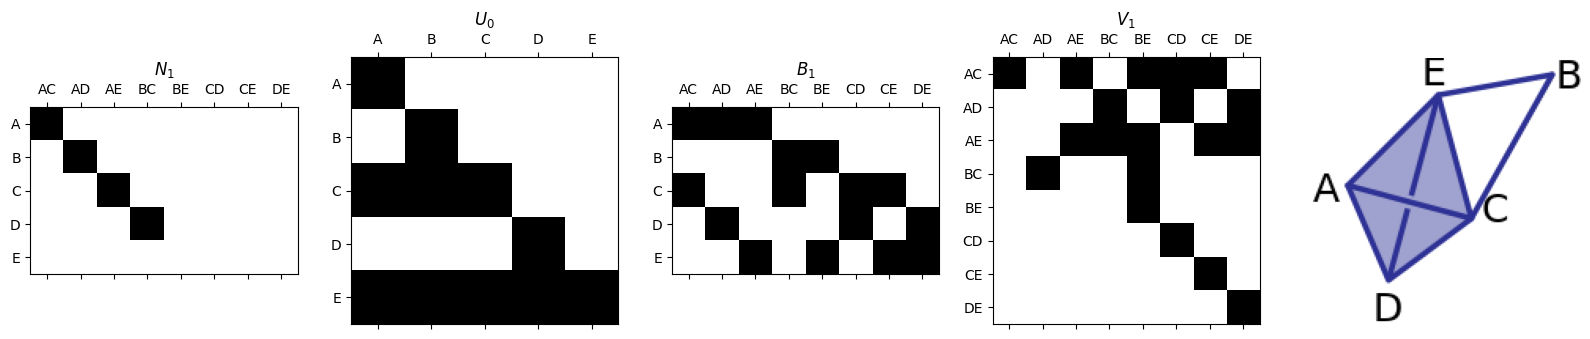

In [4]:
N1,U0,V1= smith.smith_form(B1)
plotFirstSetOfMatrices(N1,U0,B1,V1,edge_list,vertex_list,'SimplexExamples_3.png')

In [5]:
# B2
B2_df = pd.DataFrame(0,index=edge_list, columns= triangle_list)

for tri in B2_df.columns:
    B2_df.loc[tri[:2],tri] = 1     
    B2_df.loc[tri[0]+tri[2],tri] = 1 
    B2_df.loc[tri[1:],tri] = 1 

B2 = np.array(B2_df)
B2_df

ACE  ADE  CDE  ACD
AC    1    0    0    1
AD    0    1    0    1
AE    1    1    0    0
BC    0    0    0    0
BE    0    0    0    0
CD    0    0    1    1
CE    1    0    1    0
DE    0    1    1    0

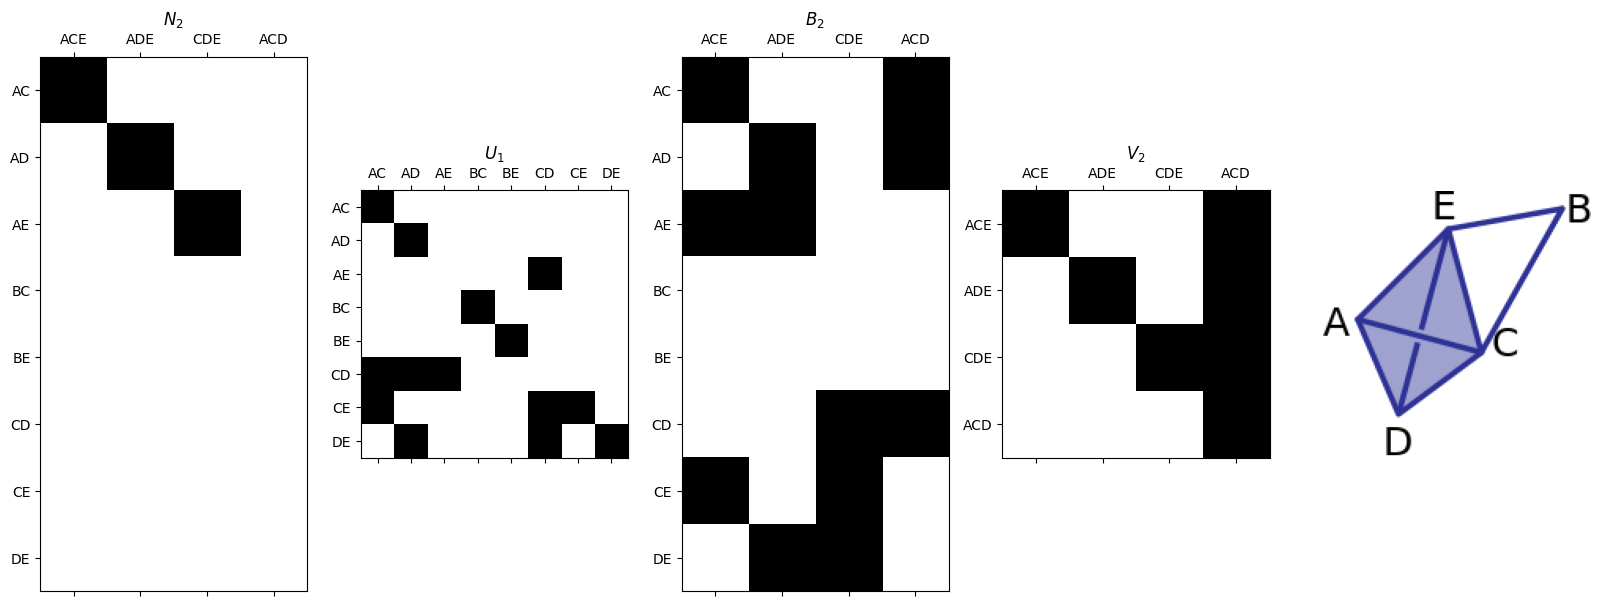

In [7]:
N2,U1,V2= smith.smith_form(B2)
plotSecondSetOfMatrices(N2,U1,B2,V2,edge_list,triangle_list,'SimplexExamples_3.png')

$$0 \longrightarrow C_2(K) \longrightarrow C_1(K) \longrightarrow C_0(K) \longrightarrow 0$$

| | $c_p$ | $z_p$ | $b_p$ | $\beta_p = z_p - b_p$|
| :--- | :--- | :--- | :--- | :--- |
|$p=0$ | 5 | 5 | 4 | 1 |
|$p=1$ | 8 | 4 | 3 | 1 |
|$p=2$ | 4 | 1 | 0 | 1 |

## Generators
### $p=0$
For $p=0$, we just have one connected component so you can use the representative `[A]` or any choice of vertices, so I'm just going to skip $p=0$. 





### $p=1$

To get the generators of the kernel, we need the last $z_p$ columns of $V_p$. The 1's correspond to the entry in the edge list in the sorted order at the top.  

In [ ]:

zp = 4 

print('Edges:', edge_list)
alpha1 = V1[:, -zp]
alpha2 = V1[:, -zp+1]
alpha3 = V1[:, -zp+2]
alpha4 = V1[:, -zp+3]
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

print('\nEdge lists for each generator of the kernel:')
print('alpha1 edges:', [edge_list[i] for i in range(len(edge_list)) if alpha1[i] == 1])
print('alpha2 edges:', [edge_list[i] for i in range(len(edge_list)) if alpha2[i] == 1])
print('alpha3 edges:', [edge_list[i] for i in range(len(edge_list)) if alpha3[i] == 1])
print('alpha4 edges:', [edge_list[i] for i in range(len(edge_list)) if alpha4[i] == 1])


Edges: ['AC', 'AD', 'AE', 'BC', 'BE', 'CD', 'CE', 'DE']
[1 0 1 1 1 0 0 0]
[1 1 0 0 0 1 0 0]
[1 0 1 0 0 0 1 0]
[0 1 1 0 0 0 0 1]

Edge lists for each generator of the kernel:
alpha1 edges: ['AC', 'AE', 'BC', 'BE']
alpha2 edges: ['AC', 'AD', 'CD']
alpha3 edges: ['AC', 'AE', 'CE']
alpha4 edges: ['AD', 'AE', 'DE']


To get generators of the image, we need the first $b_p$ columns of $U_p^{-1}$. 

In [ ]:
b1 = 3

U1inv = np.linalg.inv(U1)
# U1inv mod 2
U1inv = U1inv.astype(int) % 2
U1inv

print('Edges:', edge_list)
beta1 = U1inv[:, 0]
beta2 = U1inv[:, 1]
beta3 = U1inv[:, 2]
print('beta1:', beta1)
print('beta2:', beta2)
print('beta3:', beta3)

print('Same thing but as lists of edges:')
print('beta1 edges:', [edge_list[i] for i in range(len(edge_list)) if beta1[i] == 1])
print('beta2 edges:', [edge_list[i] for i in range(len(edge_list)) if beta2[i] == 1])
print('beta3 edges:', [edge_list[i] for i in range(len(edge_list)) if beta3[i] == 1])

Edges: ['AC', 'AD', 'AE', 'BC', 'BE', 'CD', 'CE', 'DE']
beta1: [1 0 1 0 0 0 1 0]
beta2: [0 1 1 0 0 0 0 1]
beta3: [0 0 0 0 0 1 1 1]
Same thing but as lists of edges:
beta1 edges: ['AC', 'AE', 'CE']
beta2 edges: ['AD', 'AE', 'DE']
beta3 edges: ['CD', 'CE', 'DE']


The brute force gets awful here since you'd want to list off $\alpha_i + a_1 \beta_1 + a_2 \beta_2 + a_3 \beta_3$ for every choice of $a_1, a_2, a_3$ being 0 or 1. 
So let's try to do this intelligently instead since we'll have better options for finding representatives later. We'll do this by just figuring out which of our classes actually contain 0 - Since we know that the dimension of homology must be 1, exactly 1 class should be non-zero. 


First off, since `alpha3 = beta1` and `alpha4 = beta2`, we know that both `[alpha3] = 0` and `[alpha4] = 0`. 

In [ ]:
print('alpha3:', [edge_list[i] for i in range(len(edge_list)) if alpha3[i] == 1])
print('beta1:', [edge_list[i] for i in range(len(edge_list)) if beta1[i] == 1])

print('\n')

print('alpha4:', [edge_list[i] for i in range(len(edge_list)) if alpha4[i] == 1])
print('beta2:', [edge_list[i] for i in range(len(edge_list)) if beta2[i] == 1])

alpha3: ['AC', 'AE', 'CE']
beta1: ['AC', 'AE', 'CE']


alpha4: ['AD', 'AE', 'DE']
beta2: ['AD', 'AE', 'DE']



We know from earlier that `beta1 + beta2 + beta3 = AC + AD + CD`, and this happens to be the same as `alpha2`:

In [ ]:
# Note we get the last triangle on the tetrahedron from the sum of the other three
out = (beta1 + beta2 + beta3 ) % 2
print('beta1 + beta2 + beta3:', [edge_list[i] for i in range(len(edge_list)) if out[i] == 1])


print('alpha2:', [edge_list[i] for i in range(len(edge_list)) if alpha2[i] == 1])

beta1 + beta2 + beta3: ['AC', 'AD', 'CD']
alpha2: ['AC', 'AD', 'CD']


So that means that `[alpha2] = 0`. The only remaining class is `alpha1`, so we know that the homology is generated by `[ AC + AE + BC + BE ]`

### $p=2$

This one's easy at least! There's only one generator of $Z_2$ (cycles) and none for $B_2$ (boundaries), so we know the only cycle generator is the generator of the homology. This can be found in the last column of $V_2$. 

In [ ]:
print('Triangles:', triangle_list)

print(V2[:, -1])

Triangles: ['ACE', 'ADE', 'CDE', 'ACD']
[1 1 1 1]


So the 2-dimensional homology is given by `[ACE+ADE+CDE+ACD]`. 